### Exploratory Data Analysis 

- Objective is to classify one of the flowers into given 3 categories 


In [77]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.shape

(150, 5)

In [5]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [6]:
# we need to classify each and for that we need to knw the count of each category 

iris['species'].value_counts()


# here we have balanced dataset as all catoegories are equal. 
#always check that 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### 2D scatter plot 

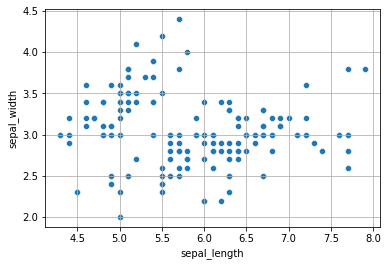

In [7]:
#lets do a 2D scatter plot

sns.scatterplot(x = iris['sepal_length'] , y = iris['sepal_width'])
plt.grid()


# or else we can do the same plot like 
# iris.plot(kind = 'scatter' , x = 'sepal_length' , y = 'sepal_width')
# plt.grid()

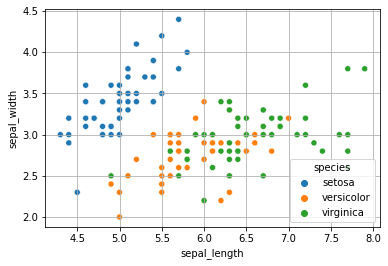

In [8]:
# coloring each catagories by adding hue 
sns.scatterplot(x = iris['sepal_length'] , y = iris['sepal_width'] , hue = iris['species'])
plt.grid()

- i have drawn a line to classify the setosa and the line equation can be found as well - linearly seperable 
- there is a blue dot that is miss classified 
- we can drawa line between the other two using THESE TWO FEATURES 
- 
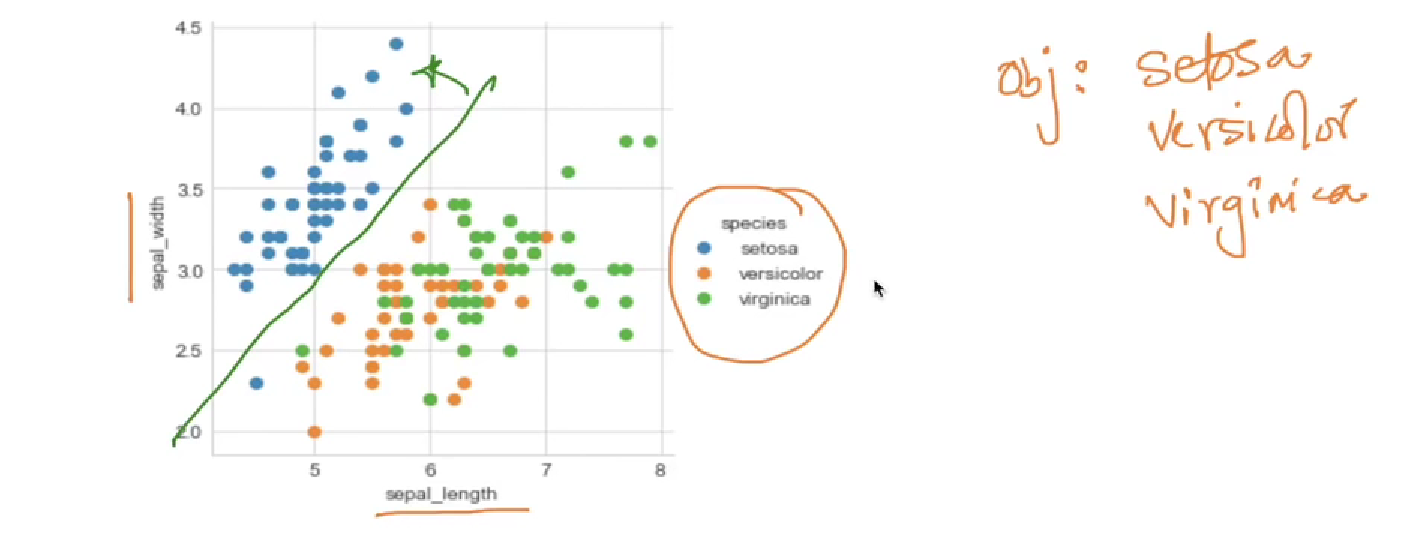

#### 3D scatter plots 

- we can do this with plotly but it cannot be priited or used in pdfs so we cant use it most of the timee.
- but we need 3D plots or more D plots and for that we use the hacks by using PAIR PLOTS

#### PAIR PLOTS

- we use pair plots to visualize 4D : in this case the 
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

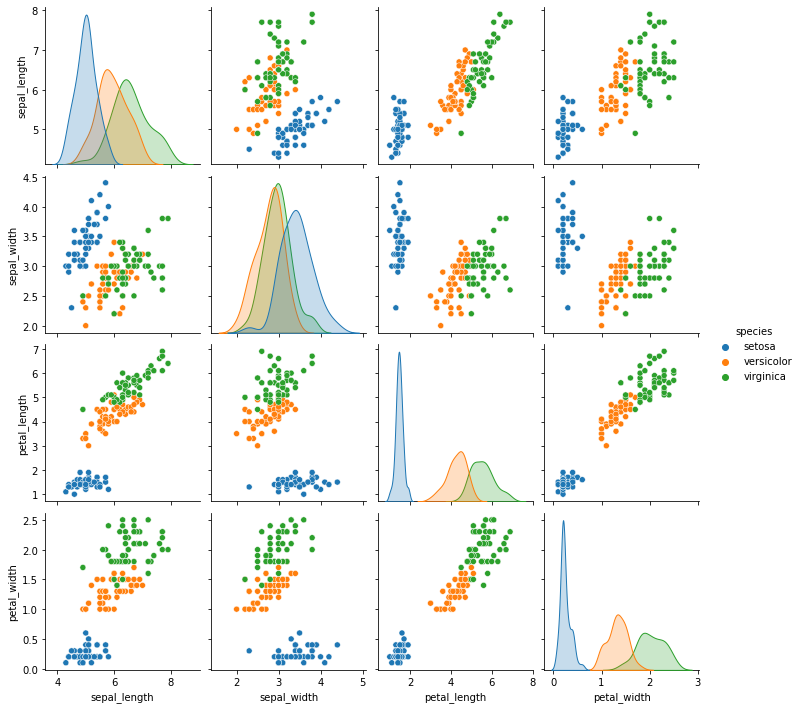

In [10]:
sns.pairplot(data = iris, hue = 'species')
plt.grid()

- PL and PW are the most useful from this figure above 
- we can build a simple model with this graph and using if else conditions 

- We have certain disadvantages 
    - Here we have 4 features and what if we have n features ??
    - number of features will be Nc2 outputs which will be difficult. 
    - For this we use PCA or T-SNAE which we will discuss later. 

- Till now we have seen 2D scatter plots, 3D scatter plots, Pair plots etc. 
- But - Where did 1D scatter plot go ??


#### HISTOGRAM , PDF , CDF 

- In 1D scatter plots the issue is 
    - 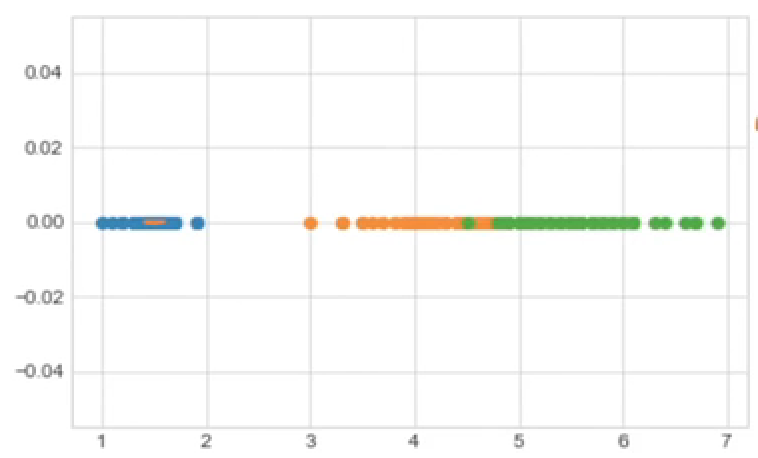
    - we cannot determine the count of points between an interval and therefore we have a hack to it 
    - turn the x axis into number of buckets adn count the points and put it in each bucket
    - That is called a HISTOGRAM 

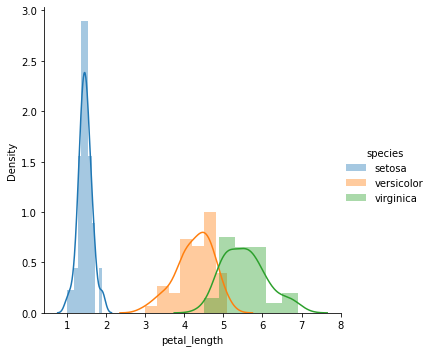

In [78]:
g = sns.FacetGrid(iris, hue ="species", size = 5)
g.map(sns.distplot, "petal_length")
g.add_legend()

- the smooth blue line is the 'probability Density Fn'
- PDF is the smoothed Histogram here 
- This shows for given petal length how many times it occures 

- here the Setosa can be distinguised clearly but not the Versicolor and Virginica 
- for overlap points beyond 4.5 the chances of being virginica is more than versicolor 
- these are the issues we face here

#### Use Histogram to do Univariate Analysis 

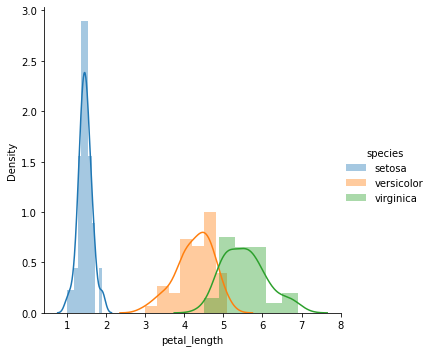

In [79]:
g = sns.FacetGrid(iris, hue ="species", size = 5)
g.map(sns.distplot, "petal_length")
g.add_legend()



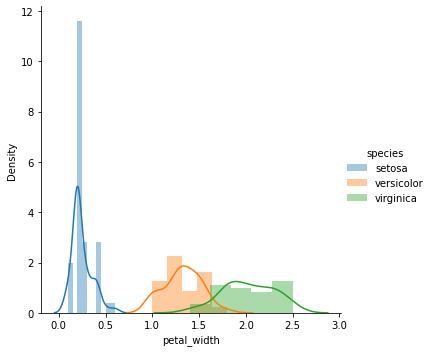

In [80]:
g = sns.FacetGrid(iris, hue ="species", size = 5)
g.map(sns.distplot, "petal_width")
g.add_legend()



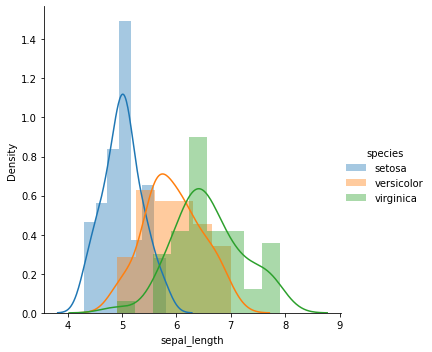

In [83]:
g = sns.FacetGrid(iris, hue ="species", size = 5)
g.map(sns.distplot, "sepal_length")
g.add_legend()



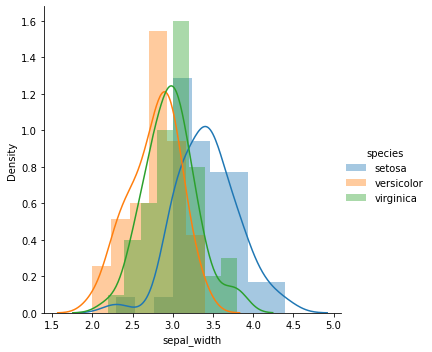

In [81]:
g = sns.FacetGrid(iris, hue ="species", size = 5)
g.map(sns.distplot, "sepal_width")
g.add_legend()



- in all the above graphs there isnt any that can really seperate out each.
- There is massive overlap 

In [104]:
iris_setosa  =  iris[iris['species'] == 'setosa']
iris_versicolor  =  iris[iris['species'] == 'versicolor']
iris_virginica  =  iris[iris['species'] == 'virginica']

### CDF and its use 

How do you build a cdf ??

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.08 0.22 0.48 0.74 0.88 0.96 0.96 1.  ]


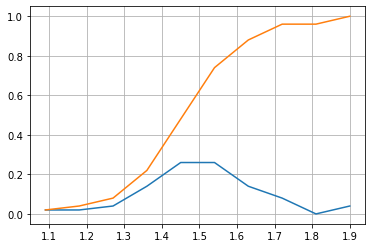

In [103]:
# for computing CDF we can compute the PDF first 

counts , bin_edges = np.histogram(iris_setosa['petal_length'] , bins = 10 , density = True)

# pdf
pdf = counts / sum(counts)
print(pdf)
print(bin_edges)

# compute cdf

cdf = np.cumsum(pdf) #computing the cumilative at each point and saving it in array
print(cdf)


# plotting pdf and cdf 
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:] , cdf)
plt.grid()

- calculating cdf - 
- 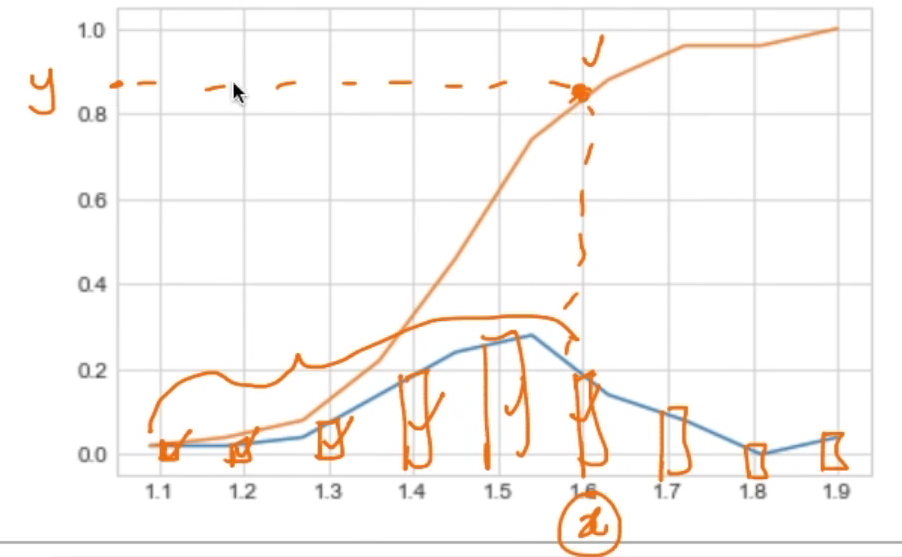

How you read a cdf 

- the blue line is the pdf : probability density function 
- the orange line is the cdf
- 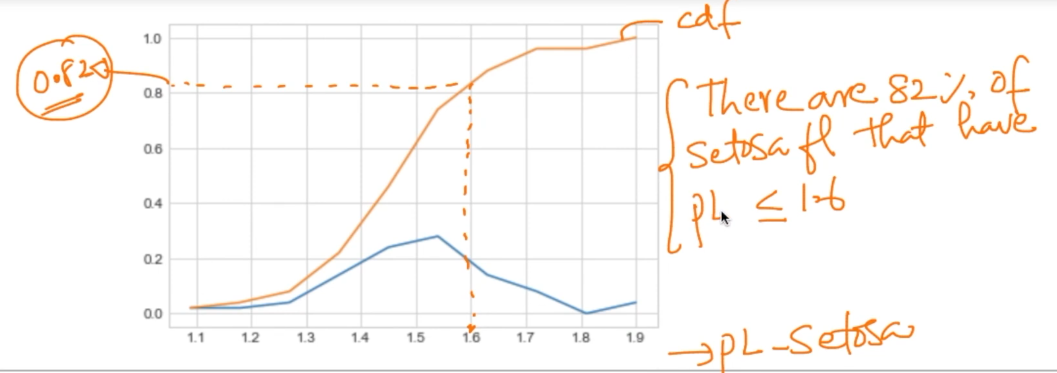

- the graph always starts at 0 and ends at 1 because it shows probability 
- 100 percent setosa flowers have Petal length less than equal to 1.9.
- the percentage is given by CDF and count is given by PDF

How is CDF useful 

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


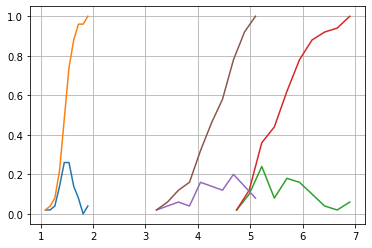

In [105]:
# for computing CDF we can compute the PDF first 

#setosa
counts , bin_edges = np.histogram(iris_setosa['petal_length'] , bins = 10 , density = True)
pdf = counts / sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf) #computing the cumilative at each point and saving it in array
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:] , cdf)

#viginica 
counts , bin_edges = np.histogram(iris_virginica['petal_length'] , bins = 10 , density = True)
pdf = counts / sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf) #computing the cumilative at each point and saving it in array
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:] , cdf)


#versicolor
counts , bin_edges = np.histogram(iris_versicolor['petal_length'] , bins = 10 , density = True)
pdf = counts / sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf) #computing the cumilative at each point and saving it in array
plt.plot(bin_edges[1:] , pdf)
plt.plot(bin_edges[1:] , cdf)


plt.grid()

- from the above graph we can say that 
- 100 percent of setosa petal length is between 1 - 2 
- 95 percent is the accuracy to be in vercisolor for petal lenght between 2 to 5 with 5 percent chance of error or miss classification 
- 90 peercent chance of right classification beyond 5 for virginica but 10 percent error if below 5 
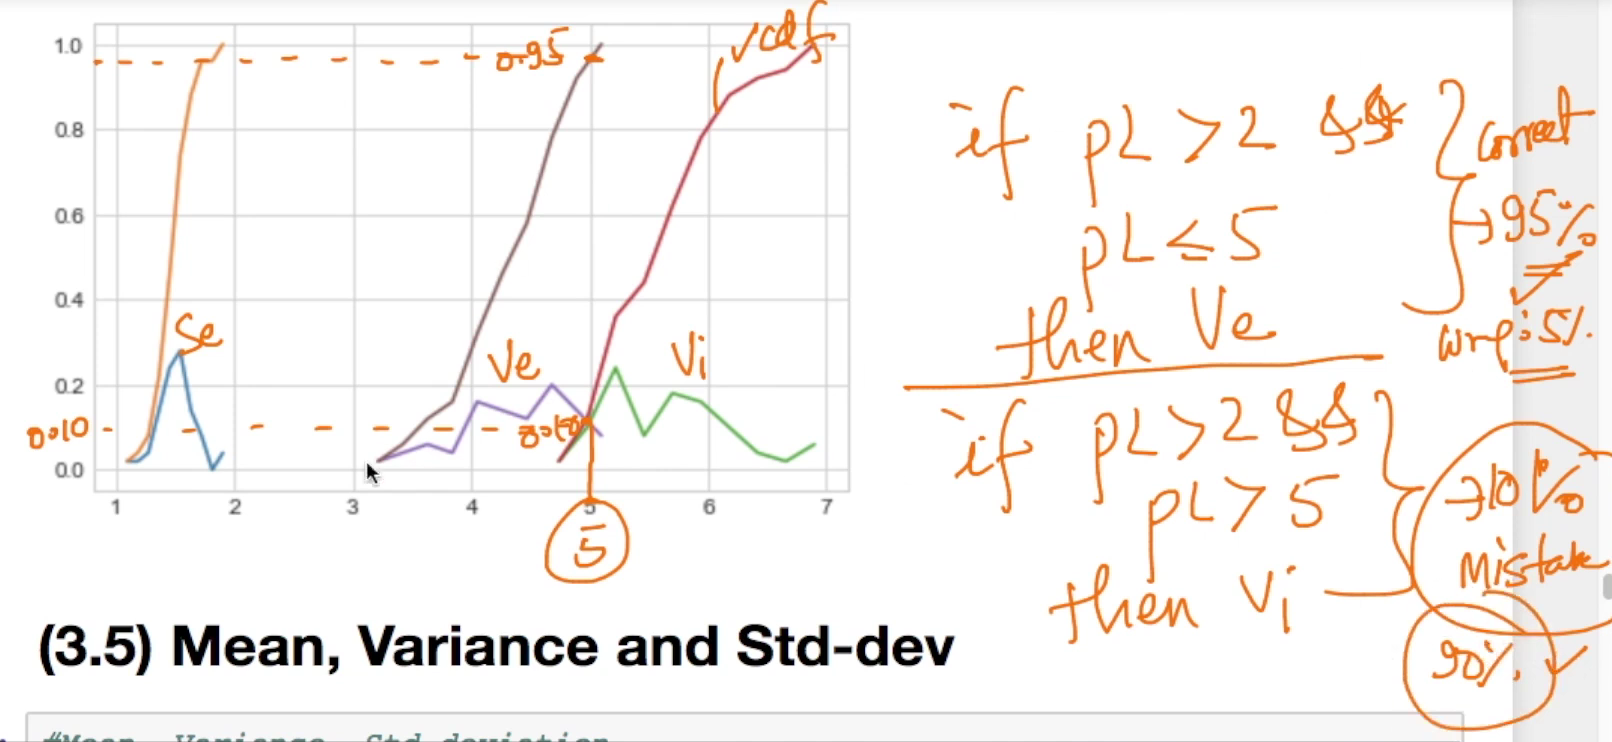

### Mean Variance Std Dev
- the problem with all is a outlier can severly affect the values 

In [121]:
# mean 
print('Means')
print(round(np.mean(iris_setosa['petal_length']),2), '- setosa mean')
print(np.mean(iris_virginica['petal_length']),'- virginica mean')
print(np.mean(iris_versicolor['petal_length']),'- versicolor mean')


# appending a value 50 to setosa to see how an outlier of 50 affects mean 
print(round(np.mean(np.append(iris_setosa['petal_length'], 50)),2), '- outlier_setosa_mean')


# std dev 

print('std dev')
print(round(np.std(iris_setosa['petal_length']),2), '- setosa std')
print(np.std(iris_virginica['petal_length']),'- virginica std')
print(np.std(iris_versicolor['petal_length']),'- versicolor std')


Means
1.46 - setosa mean
5.552 - virginica mean
4.26 - versicolor mean
2.41 - outlier_setosa_mean
std dev
0.17 - setosa std
0.5463478745268441 - virginica std
0.4651881339845204 - versicolor std


Use of mean 
- setosa has a small petal length 
- ver and versi is closer 
- the mean has this fundamental problem of increasing with outlier 
- mean tells me the central tendancy - it shows the average petal length 


Use of Spread / Std Dev 

- will give the intention of how wide the values are spread or the petal lenght range \
- 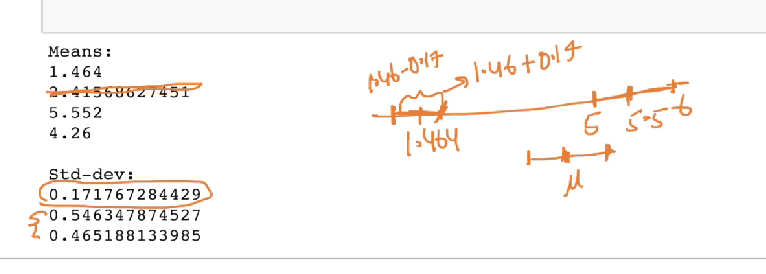